In [1]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
# split data into a the training and test set.
from sklearn.model_selection import train_test_split# model for splitting the data
# import accuracy_score to check for model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,r2_score, explained_variance_score, max_error, d2_tweedie_score

In [2]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import the dataset.
dataset = pd.read_csv("dataset.csv")
# printing first 5 observations of our dataset
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# seperate features and the study variable
X_feat = dataset.iloc[:, :-1].values
y_targt = dataset.iloc[:, -1].values
# we split 80% of the data for model training and 20% accuracy model testing
XTrain, XTest, YTrain, YTest = train_test_split(X_feat, y_targt, test_size = 0.2, random_state = 0)
# Scalling the features
stndS = StandardScaler()
XTrain = stndS.fit_transform(XTrain)
XTest = stndS.transform(XTest)

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’} or callable, default=’linear’
Kernel used for PCA.

In [4]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
# transform and fit the feature of the training set
XTrain = Kernel_pca.fit_transform(XTrain)
# transform features of the test set
XTest = Kernel_pca.transform(XTest)

In [5]:
l = []
models = [
    ('Linear Regression', LinearRegression()),
    ('Logistic Regression', LogisticRegression(random_state = 0)),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Passive Aggressive Classifier', PassiveAggressiveClassifier()),
    ('SGD Classifier', SGDClassifier()),
    ('Perceptron', Perceptron()),
    ('MLP Classifier', MLPClassifier()),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('Gaussian NB', GaussianNB()),
    ('Extra Tree Classifier', ExtraTreeClassifier()),
    ('Linear SVC', LinearSVC()),
    ('Gaussian Process Classifier', GaussianProcessClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
]

In [6]:
for name, model in models:
    print(f"Training and evaluating {name}...")
    model.fit(XTrain, YTrain)
    y_pred=model.predict(XTest)
    mse = mean_squared_error(YTest, y_pred)
    # print(f"{name} Mean Squared Error: {mse}")
    try:
        r2 = r2_score(YTest, y_pred)
    except Exception as e:
        r2 = 0.00

    try:
        rmse = mean_squared_error(YTest, y_pred, squared=False)
    except Exception as e:
        rmse = 0.00


    try:
        explained_variance = explained_variance_score(YTest, y_pred, sample_weight=None, multioutput='uniform_average')
    except Exception as e:
        explained_variance = 0

    try:
        max_error_ = max_error(YTest, y_pred)
    except Exception as e:
        max_error_ = 0

    try:
        d2_tweedie_score_ =  d2_tweedie_score(YTest, y_pred)
    except Exception as e:
        d2_tweedie_score_ = 0
        
    if 'Regressor' in name:
        # For regression models, calculate and print Mean Squared Error
        # y_pred = model.predict(XTest)
        accuracy = accuracy_score(YTest, y_pred)
        # print(f"{name} Accuracy: {accuracy}")
        # confusn = confusion_matrix(YTest, y_pred)
        # display(confusn)
        l.append([name,accuracy,  mse,r2,rmse,explained_variance,max_error_,d2_tweedie_score_])
        
        
    elif 'Classifier' in name:
        # For classification models, calculate and print accuracy
        # y_pred = model.predict(XTest)
        accuracy = accuracy_score(YTest, y_pred)
        # print(f"{name} Accuracy: {accuracy}")
        # confusn = confusion_matrix(YTest, y_pred)
        # display(confusn)
        l.append([name,accuracy,  mse,r2,rmse,explained_variance,max_error_,d2_tweedie_score_])
        
    
    
    
    print("\n")

df1 = pd.DataFrame(l, columns=["Model Name", "Score", "mean", "rmse","r2","explained_variance","max_error","d2_tweedie_score"])
df1

Training and evaluating Linear Regression...


Training and evaluating Logistic Regression...


Training and evaluating Decision Tree Regressor...


Training and evaluating Decision Tree Classifier...


Training and evaluating Random Forest Classifier...


Training and evaluating Passive Aggressive Classifier...


Training and evaluating SGD Classifier...


Training and evaluating Perceptron...


Training and evaluating MLP Classifier...


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(




Training and evaluating KNeighbors Classifier...


Training and evaluating SVC...


Training and evaluating Gaussian NB...


Training and evaluating Extra Tree Classifier...


Training and evaluating Linear SVC...


Training and evaluating Gaussian Process Classifier...


Training and evaluating Gradient Boosting Classifier...




,Model Name,Score,mean,rmse,r2,explained_variance,max_error,d2_tweedie_score
0,Decision Tree Regressor,0.972222,0.027778,0.945122,0.166667,0.946646,1.0,0.945122
1,Decision Tree Classifier,0.944444,0.138889,0.725610,0.372678,0.727134,2.0,0.725610
2,Random Forest Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000
3,Passive Aggressive Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000
4,SGD Classifier,0.972222,0.027778,0.945122,0.166667,0.946646,1.0,0.945122
5,MLP Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000
6,KNeighbors Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000
7,Extra Tree Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000
8,Gaussian Process Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000
9,Gradient Boosting Classifier,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,1.000000


In [7]:

# initialize the classfier
clsfier = LogisticRegression(random_state = 0)
# fit the training data on the classfier
clsfier.fit(XTrain, YTrain)
# import the confusion_matrix

Yprd = clsfier.predict(XTest) # prindicting the X test using our classfier build above

# checking the prediction accuracy of our classifier using the confusion matrix
confusn = confusion_matrix(YTest, Yprd)
print(confusn)
# print the model score
display(accuracy_score(YTest, Yprd) )
display(Yprd)
display(YTest)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1], dtype=int64)

C:\Users\HP\AppData\Local\Temp\ipykernel_18516\3994067338.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(XSet[YSet == j, 0], XSet[YSet == j, 1],


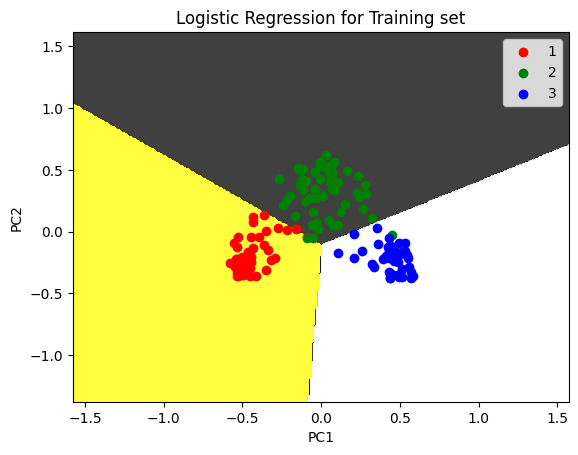

In [8]:
from matplotlib.colors import ListedColormap
XSet, YSet = XTrain, YTrain
# Creating a rectangular grid using XSet values
X_1, X_2 = np.meshgrid(np.arange(start = XSet[:, 0].min() - 1, stop = XSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XSet[:, 1].min() - 1, stop = XSet[:, 1].max() + 1, step = 0.01))
plt.contourf(X_1, X_2, clsfier.predict(np.array([X_1.ravel(), X_2.ravel()]).T).reshape(X_1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'black', 'white')))
# Set the limits of x-axis
plt.xlim(X_1.min(), X_1.max())
# Set the limits of y-axis
plt.ylim(X_2.min(), X_2.max())
for i, j in enumerate(np.unique(YSet)):
  # create a scatter plot using XSet and YSet
    plt.scatter(XSet[YSet == j, 0], XSet[YSet == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) # creat a colarmap of a discrete colour levels 
# add tittle to the plot                                            
plt.title('Logistic Regression for Training set')
# labelling the x-axis
plt.xlabel('PC1')
# labelling the y-axis
plt.ylabel('PC2')
# generate a plot key
plt.legend() 
# print the scatter plot
plt.show() 

C:\Users\HP\AppData\Local\Temp\ipykernel_18516\465613360.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(XSet[YSet == j, 0], XSet[YSet == j, 1],


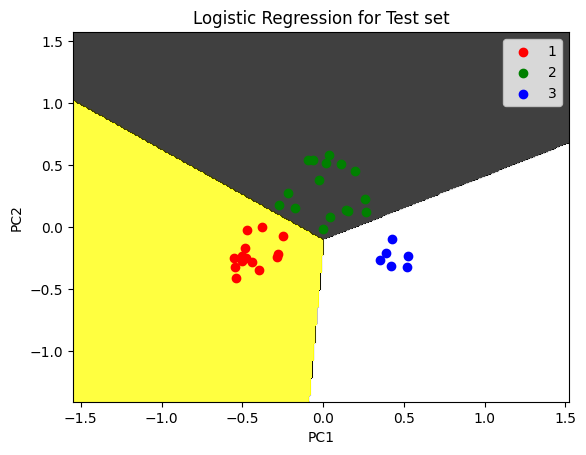

In [9]:
from matplotlib.colors import ListedColormap
XSet, YSet = XTest, YTest
# Creating a rectangular grid using XSet values
X_1, X_2 = np.meshgrid(np.arange(start = XSet[:, 0].min() - 1, stop = XSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = XSet[:, 1].min() - 1, stop = XSet[:, 1].max() + 1, step = 0.01))
plt.contourf(X_1, X_2, clsfier.predict(np.array([X_1.ravel(), X_2.ravel()]).T).reshape(X_1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'black', 'white'))) # partions colouring
# Set the limits of x-axis
plt.xlim(X_1.min(), X_1.max())
# Set the limits of y-axis
plt.ylim(X_2.min(), X_2.max())
for i, j in enumerate(np.unique(YSet)):
  # a scatter plot XSet and YSet, both are sets of the test set
    plt.scatter(XSet[YSet == j, 0], XSet[YSet == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) # creat a colarmap
# add tittle to the plot              
plt.title('Logistic Regression for Test set') 
# labelling x-axis
plt.xlabel('PC1')
# labelling y-axis
plt.ylabel('PC2')
# generate a plot key
plt.legend() 
# print the plot
plt.show() 

# help website: 
1. https://www.section.io/engineering-education/kernel-pca-in-python/
2. https://www.educba.com/kernel-methods/
3. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html